In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime as datetime
import pandas_profiling as pp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("D:/Data Analysis/OTT/amazon_prime_titles.csv")
pd.set_option('display.max_columns',None)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [252]:
df.shape

(9668, 12)

In [253]:
df.size

116016

In [254]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [256]:
df=df.rename(columns={'listed_in':'category'})
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


<AxesSubplot:>

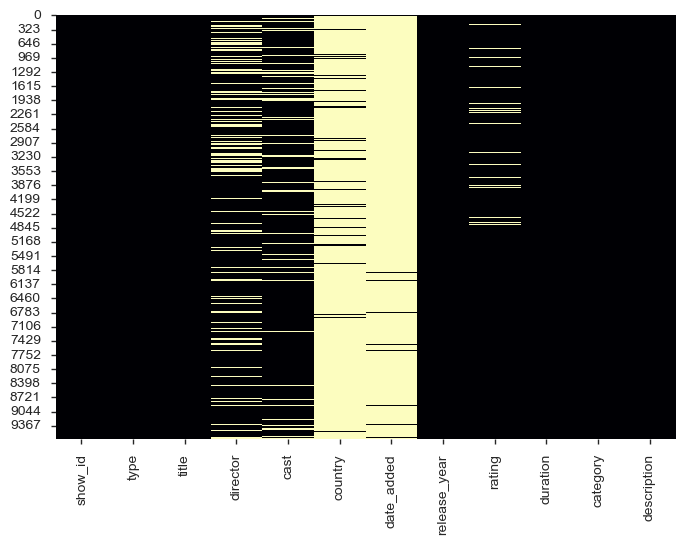

In [257]:
sns.heatmap(df.isna(),cmap='magma',cbar=False)

In [258]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i]>0:
        print('Total Number of missing values in '+df.isnull().sum().index[i]+' : ',df.isnull().sum()[i])

Total Number of missing values in director :  2082
Total Number of missing values in cast :  1233
Total Number of missing values in country :  8996
Total Number of missing values in date_added :  9513
Total Number of missing values in rating :  337


In [259]:
df['rating'].value_counts()

13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: rating, dtype: int64

In [260]:
print('Unique value in rating:',len(df['rating'].unique()))

Unique value in rating: 25


In [261]:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [262]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
description     0
dtype: int64

In [263]:
type_counts=df['type'].value_counts()
type_counts

Movie      7814
TV Show    1854
Name: type, dtype: int64

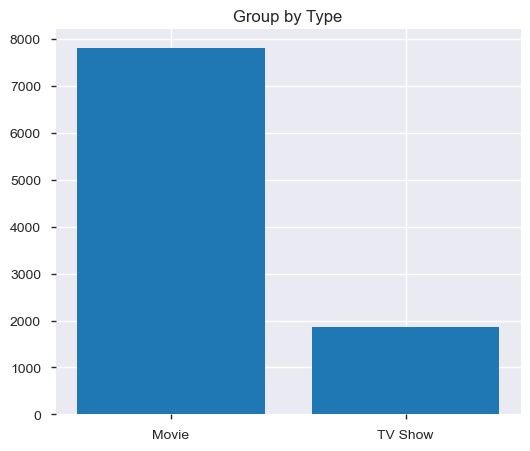

In [264]:
plt.figure(figsize=(6,5))
plt.bar(type_counts.index,type_counts.values)
plt.title('Group by Type')
plt.show()

<AxesSubplot:ylabel='category'>

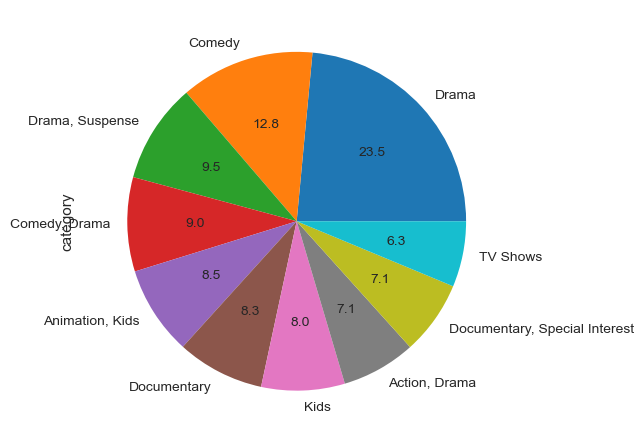

In [265]:
df.category.value_counts(ascending=False).head(10).plot(kind='pie',autopct='%1.1f')

<AxesSubplot:>

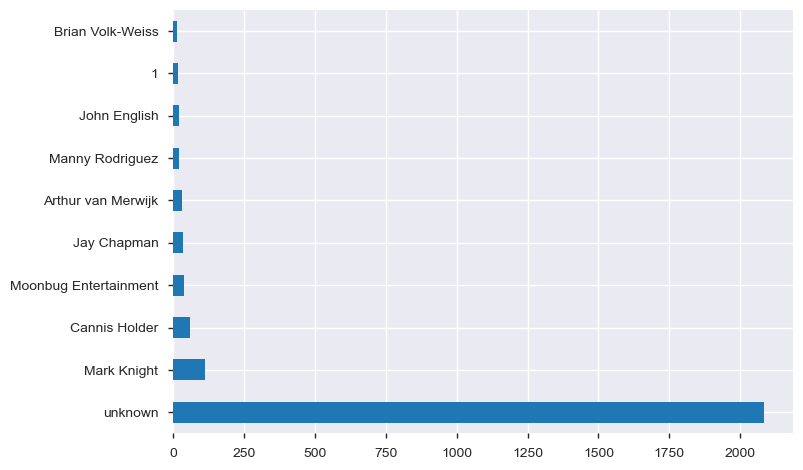

In [266]:
df.director.value_counts(ascending=False).head(10).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

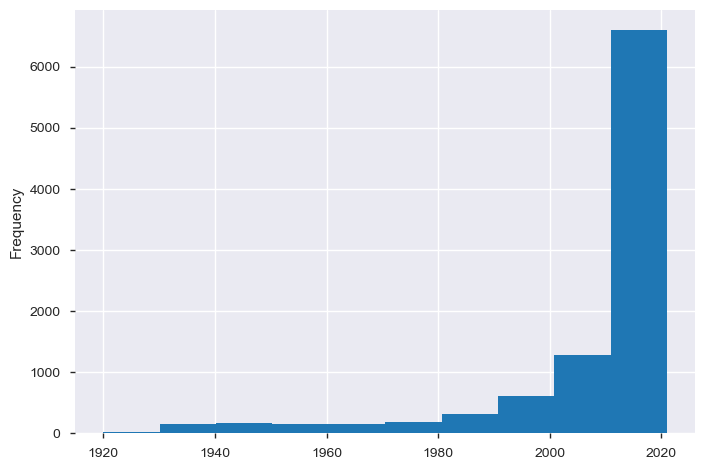

In [267]:
df['release_year'].plot(kind='hist')

In [268]:
un_dir=df['director'].value_counts()
un_country=df['country'].value_counts()
print(un_dir)
print('-'*50)
print(un_country)

unknown                  2082
Mark Knight               113
Cannis Holder              61
Moonbug Entertainment      37
Jay Chapman                34
                         ... 
Andrew Traucki              1
Karyn Kusama                1
K. Subash                   1
Robert Cuffley              1
Steve Barker                1
Name: director, Length: 5775, dtype: int64
--------------------------------------------------
unknown                                  8996
United States                             253
India                                     229
United Kingdom                             28
Canada                                     16
                                         ... 
United States, Germany, Brazil, Italy       1
South Africa                                1
Australia, United States, Germany           1
Germany, Austria, United States             1
Italy, Spain                                1
Name: country, Length: 87, dtype: int64


<AxesSubplot:>

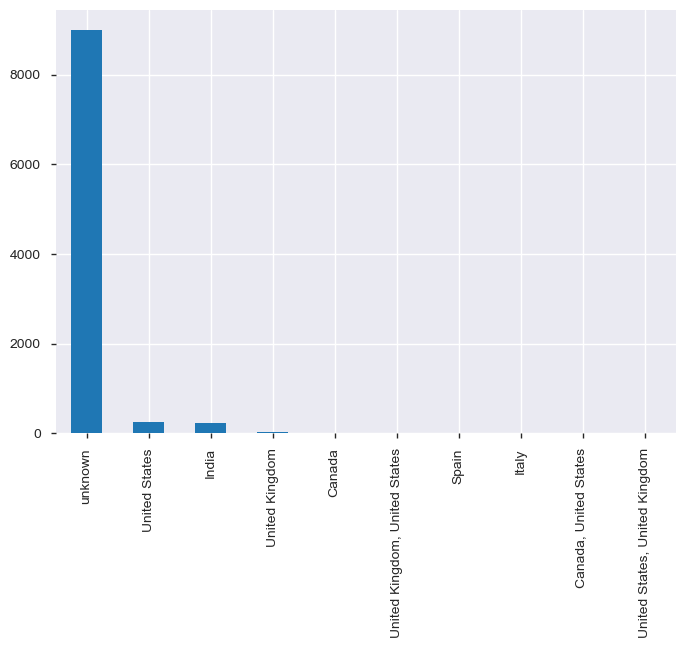

In [269]:
df.country.value_counts(ascending=False).head(10).plot(kind='bar')

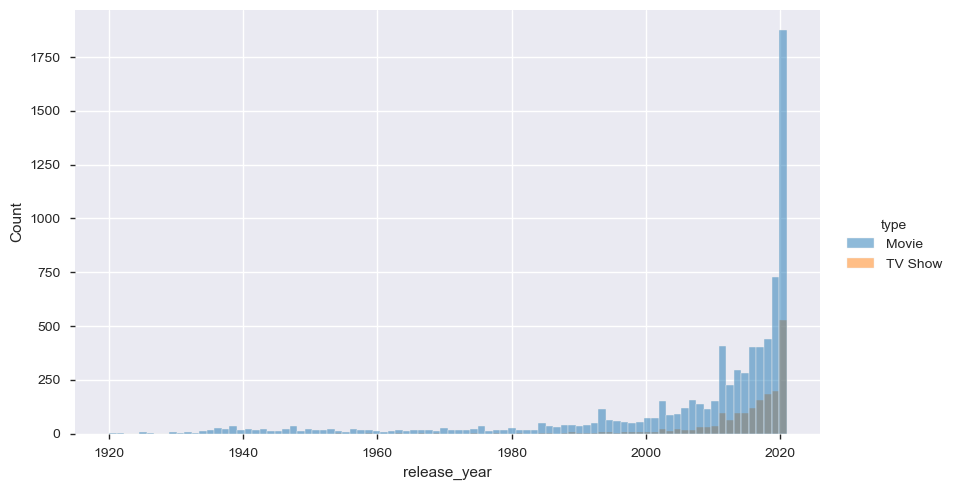

In [270]:
sns.displot(data=df,x='release_year',hue='type',height=5,aspect=1.7)

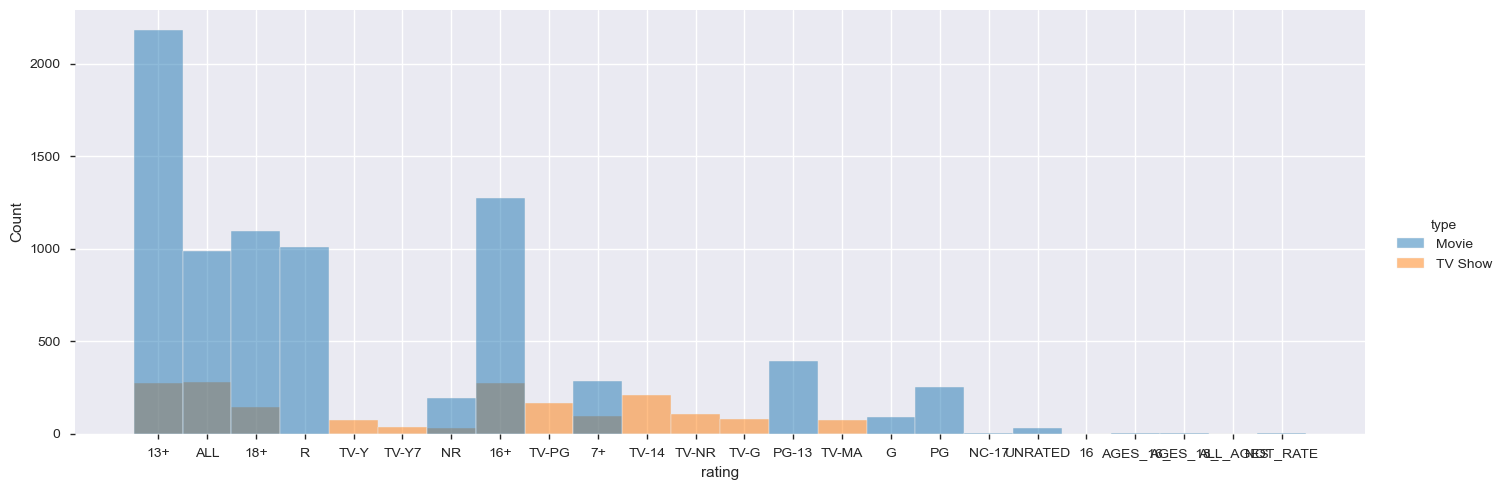

In [271]:
sns.displot(data=df,x='rating',hue='type',aspect=2.8)

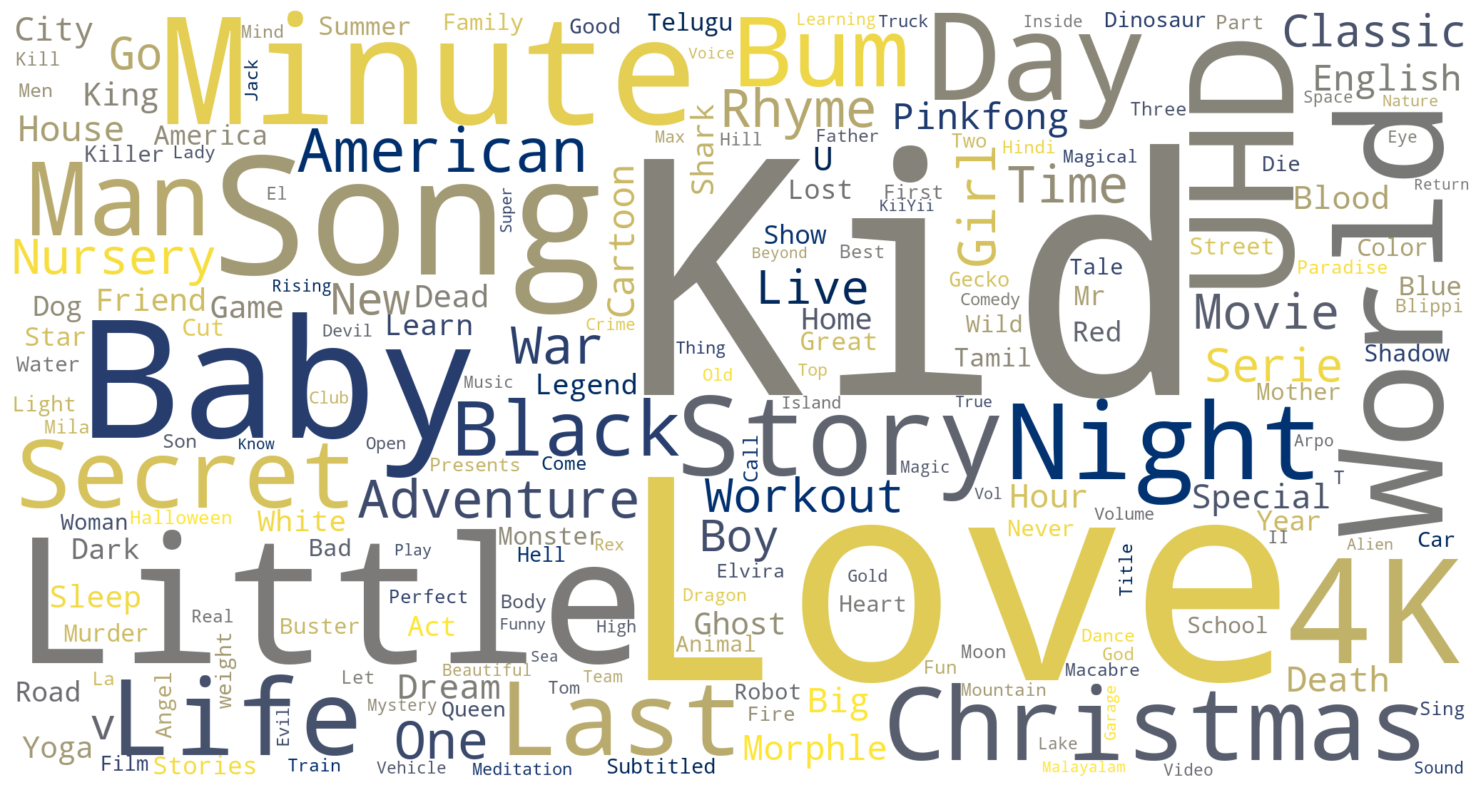

In [272]:
txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',width = 2048, height = 1080,colormap='cividis').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [273]:
Profile_report = pp.ProfileReport(df,title='Amazon prime data')
Profile_report.to_notebook_iframe()